In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import unicodedata
import re

In [20]:

def normalize_name(area_name):
    # Bỏ dấu tiếng Việt
    area_name = unicodedata.normalize('NFD', area_name)
    area_name = ''.join(ch for ch in area_name if unicodedata.category(ch) != 'Mn')
    
    area_name = area_name.replace('đ', 'd')
    # Chuyển tất cả sang chữ thường
    area_name = area_name.lower()

    # Thay dấu cách và các ký tự không hợp lệ bằng dấu gạch dưới
    area_name = re.sub(r'\s+|, ', '_', area_name)  # Thay khoảng trắng

    return area_name

### Biểu đồ tương quan tại khu vực

In [21]:
area = 'Hà Nội'

In [22]:
json_path = f'../Data/Json/Correlation/area/{normalize_name(area)}.json'

In [23]:
with open(json_path, "r", encoding="utf-8") as file:
    data = json.load(file)

In [24]:
corr = pd.DataFrame(data=data['data'], columns=data['columns'], index=data['index'])

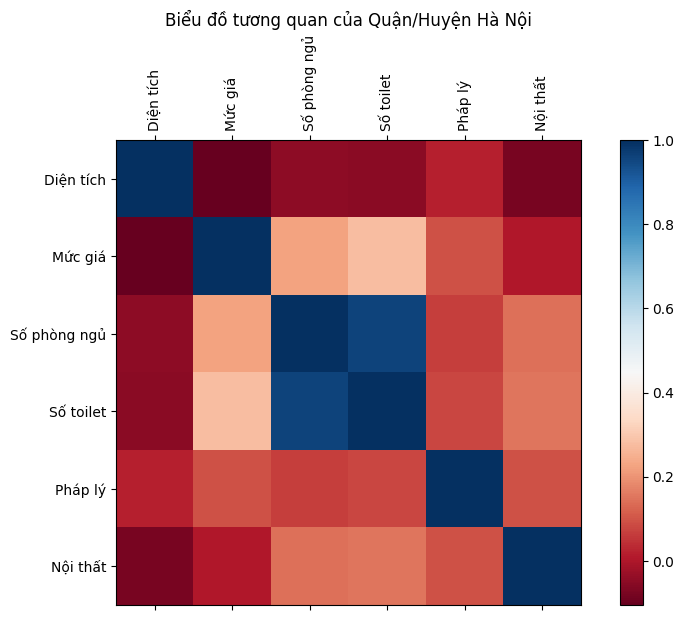

In [25]:
fig = plt.figure(figsize=(10, 6))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title(f'Biểu đồ tương quan của Quận/Huyện {area}')
plt.colorbar()

### Biểu đồ tương quan theo loại hình

In [30]:
type = 'Căn hộ chung cư'

In [31]:
json_path = f'../Data/Json/Correlation/type/{normalize_name(type)}.json'

In [32]:
with open(json_path, "r", encoding="utf-8") as file:
    data = json.load(file)
corr = pd.DataFrame(data=data['data'], columns=data['columns'], index=data['index'])

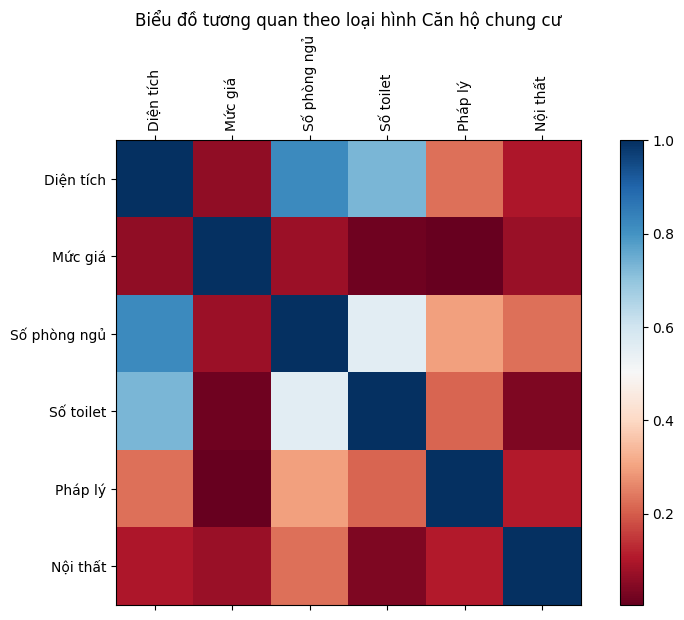

In [33]:
fig = plt.figure(figsize=(10, 6))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title(f'Biểu đồ tương quan theo loại hình {type}')
plt.colorbar()